# LSTM for Stock Price Prediction

* **Date:** represents the date of the trading day.

* **Open:** represents the opening price of the stock for the trading day.

* **High:** represents the highest price of the stock for the trading day.

* **Low:** represents the lowest price of the stock for the trading day.

* **Close:** represents the closing price of the stock for the trading day.

* **Adj close:** represents the adjusted closing price of the stock for the trading day.

* **Volume:** represents the trading volume for the trading day.




# Data Understanding

In [1]:
# to read and process data

import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt



# to evaluate the model and scale the data

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error





# modeling

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



# warnings

import warnings

warnings.filterwarnings('ignore')



# Tensorflow warning blocking

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
def check_df(dataframe, head=5):

  print("#################### Shape ####################")

  print(dataframe.shape)

  print("#################### Types ####################")

  print(dataframe.dtypes)

  print("#################### Head ####################")

  print(dataframe.head(head))

  print("#################### Tail ####################")

  print(dataframe.tail(head))

  print("#################### NA ####################")

  print(dataframe.isnull().sum())

  print("#################### Quantiles ####################")

  print(dataframe.select_dtypes(include=[np.number]).quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

#################### Shape ####################
(2416, 7)
#################### Types ####################
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
#################### Head ####################
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
#################### Tail ####################
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002 

In [6]:
# converting object type to datetime for date



df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
tesla_df = df[["Date", "Close"]]

In [9]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [10]:
print("Minimum Date:", tesla_df["Date"].min())

print("Maximum Date:", tesla_df["Date"].max())

Minimum Date: 2010-06-29 00:00:00
Maximum Date: 2020-02-03 00:00:00


In [11]:
tesla_df.index = tesla_df["Date"]

In [12]:
tesla_df

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [13]:
tesla_df.drop("Date", axis=1, inplace=True)

In [14]:
tesla_df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [15]:
result_df = tesla_df.copy()

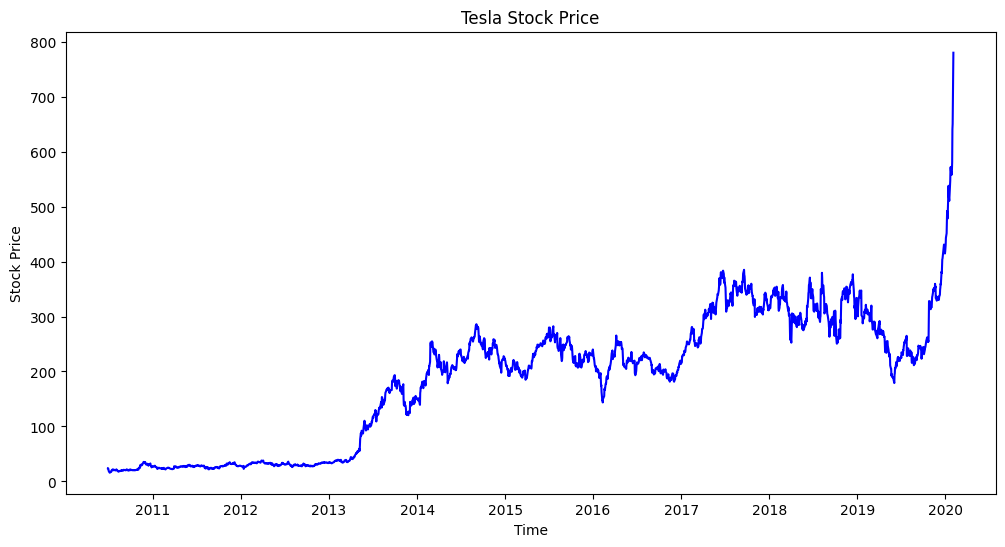

In [16]:
plt.figure(figsize=(12,6))

plt.plot(tesla_df['Close'], color='blue');

plt.ylabel('Stock Price')

plt.title('Tesla Stock Price')

plt.xlabel('Time')

plt.show()

In [17]:
tesla_df = tesla_df.values

In [18]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [19]:
tesla_df = tesla_df.astype('float32')

# Train & Test Split

In [20]:
def split_data(dataframe, test_size):

  pos = int(round(len(dataframe) * (1-test_size)))

  train = dataframe[:pos]

  test = dataframe[pos:]

  return train, test, pos

In [21]:
# 20% test 80% train

train, test, pos = split_data(tesla_df, 0.20)

In [22]:
print(train.shape, test.shape)

(1933, 1) (483, 1)


In [23]:
scaler_train = MinMaxScaler(feature_range = (0,1))

In [24]:
train = scaler_train.fit_transform(train)

In [25]:
scaler_test = MinMaxScaler(feature_range = (0,1))

In [26]:
test = scaler_test.fit_transform(test)

In [27]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [28]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [29]:
def create_features(data, lookback):

  X, Y = [], []

  for i in range (lookback, len(data)):

    X.append(data[i-lookback:i,0])

    Y.append(data[i,0])



  return np.array(X), np.array(Y)

In [30]:
lookback = 20

In [31]:
# train dataset

X_train, y_train = create_features(train, lookback)



# test dataset

X_test, y_test = create_features(test, lookback)

In [32]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [33]:
X_train[0:5]

array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566],
       [0.02174973, 0.01668472, 0.0092091 , 0.00083966, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.011078  , 0.01310942, 0.0165493 , 0.01218851, 0.01197183,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611],
       [0.01668472, 0.0092091 , 0.00083966, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.011078  ,
        0.01310942, 0.0165493 , 0.01218851, 0.01197183, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395],
       [0.0092091 , 0.00083966, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.011078  , 0.01310942,
        0.0165493 , 0.01218851, 0.01197183, 0

In [34]:
y_train[0:5]

array([0.01332611, 0.01232395, 0.01121344, 0.01386782, 0.01665764],
      dtype=float32)

In [35]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))



y_train = y_train.reshape(-1,1)

y_test = y_test.reshape(-1,1)



print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


# Modeling

In [36]:
model = Sequential()

model.add(LSTM(units=50,

               activation='relu',

               input_shape=(X_train.shape[1], lookback)))

model.add(Dropout(0.2))

model.add(Dense(1))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)



# Optimization and Evaluation Metrics

In [38]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
callbacks = [EarlyStopping(monitor='val_loss',

                           patience=3,

                           verbose=1,

                           mode="min"),

             ModelCheckpoint(filepath='mymodel.keras',

                             monitor='val_loss',

                             mode='min',

                             save_best_only=True,

                             save_weights_only=False,

                             verbose=1)]

In [40]:
history = model.fit(x=X_train,

                    y=y_train,

                    epochs=100,

                    batch_size=20,

                    validation_data=(X_test, y_test),

                    callbacks=callbacks,

                    shuffle=False)

Epoch 1/100
94/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 1: val_loss improved from inf to 0.00459, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 2/100
92/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 2: val_loss improved from 0.00459 to 0.00405, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0040
Epoch 3/100
74/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 3: val_loss improved from 0.00405 to 0.00365, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 4/100
73/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 4: val_loss improved from 0.00365 to 0.00357, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/100
75/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 5: val_loss improved from 0.00357 to 0.00333, sa

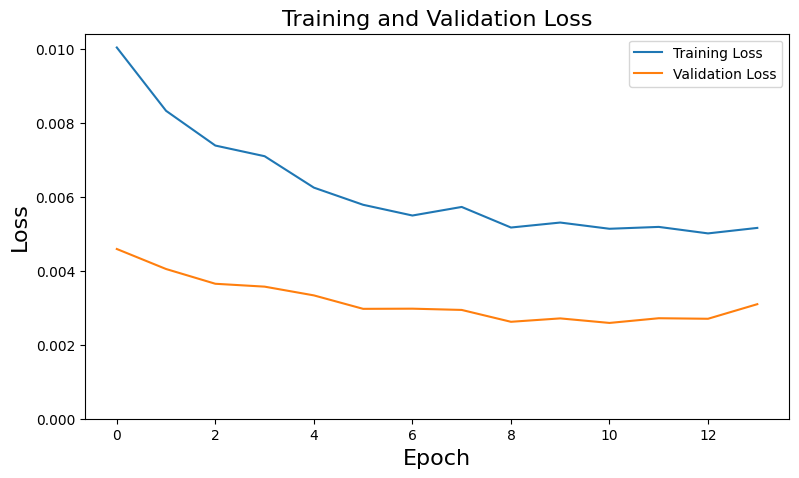

In [41]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,2)

plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.legend(loc='upper right')

plt.xlabel('Epoch', fontsize=16)

plt.ylabel('Loss', fontsize=16)

plt.ylim([0,max(plt.ylim())])

plt.title('Training and Validation Loss', fontsize=16)

plt.show()

# Evaluation


In [42]:
loss = model.evaluate(X_test, y_test, batch_size=20)

print("\nTest loss: %.1f%%" % (100.0 * loss))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 

Test loss: 0.3%


In [43]:
train_predict = model.predict(X_train)

test_predict = model.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [44]:
train_predict = scaler_train.inverse_transform(train_predict)

test_predict = scaler_test.inverse_transform(test_predict)

In [45]:
y_train = scaler_train.inverse_transform(y_train)

y_test = scaler_test.inverse_transform(y_test)

In [46]:
# RMSE for Train Set



train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))

In [47]:
# RMSE for Test Set



test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [48]:
print(f"Train RMSE: {train_rmse}")

print(f"Test RMSE: {test_rmse}")

Train RMSE: 14.946998596191406
Test RMSE: 33.43955612182617


In [49]:
train_prediction_df = result_df[lookback:pos]

train_prediction_df["Predicted"] = train_predict

train_prediction_df.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,39.976364
2010-07-29,20.350000,39.976364
2010-07-30,19.940001,39.976364
2010-08-02,20.920000,39.976364
2010-08-03,21.950001,39.976364


In [50]:
test_prediction_df = result_df[pos+lookback:]

test_prediction_df["Predicted"] = test_predict

test_prediction_df.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,326.292542
2018-04-04,286.940002,323.115997
2018-04-05,305.720001,323.496246
2018-04-06,299.299988,323.790863
2018-04-09,289.660004,323.041199


# Visualization of Train and Test Predictions

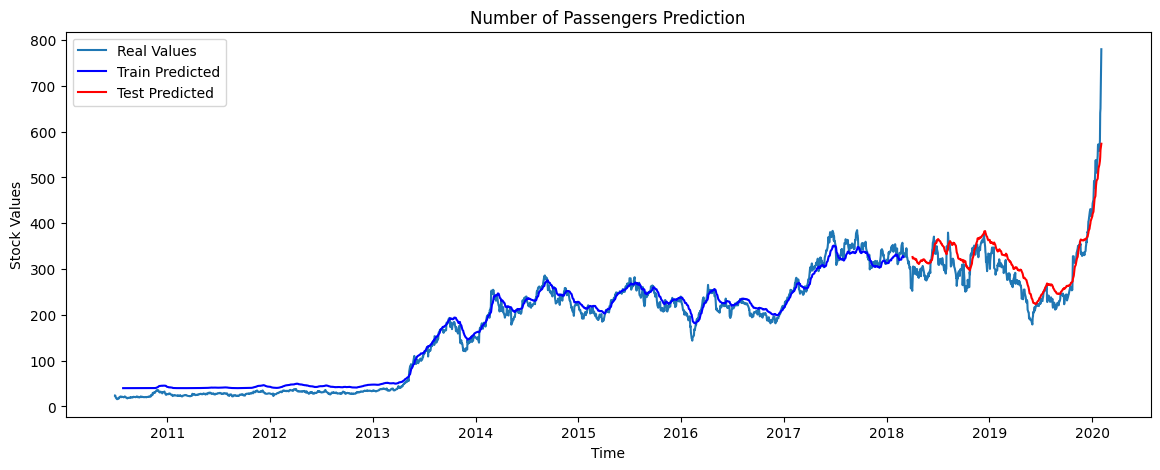

In [51]:
plt.figure(figsize=(14,5))

plt.plot(result_df, label = 'Real Values')

plt.plot(train_prediction_df["Predicted"], color = 'blue', label = 'Train Predicted')

plt.plot(test_prediction_df["Predicted"], color = 'red', label = 'Test Predicted')

plt.title('Number of Passengers Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Values')

plt.legend()

plt.show()